In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import spacy
import string



from spacy.lang.en import English
from spacy.tokens import Doc
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokenizer import Tokenizer


from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud

#LinearSVC,Logistic Regression,RandomForest,DecisionTree,KNeighborsClassifier



In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
imdb = pd.read_csv('/Users/jeremiahkamama/Desktop/Article Projects/Spacy-Analysis/data/imdb.csv')

imdb.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [4]:
imdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
imdb.sentiment.replace("positive", 1 , inplace= True)
imdb.sentiment.replace("negative", 0, inplace= True)
imdb.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

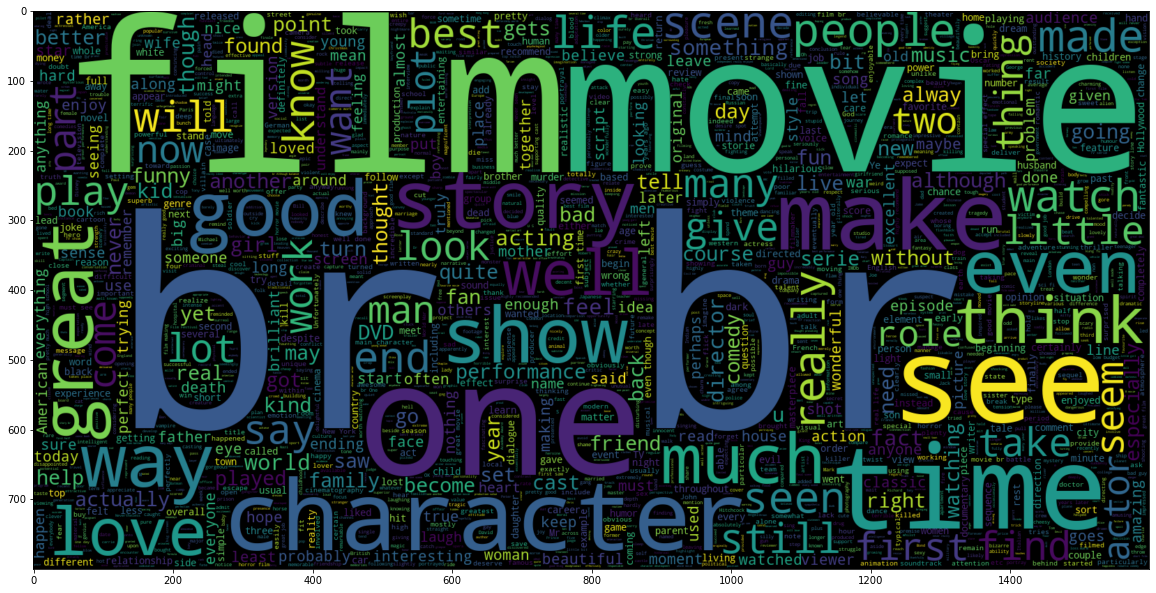

In [10]:
plt.figure(figsize = (20,20))
cloud = WordCloud(max_words= 2000, width= 1600,height= 800).generate("".join(imdb[imdb.sentiment == 1].review))
plt.imshow(cloud, interpolation='bilinear')

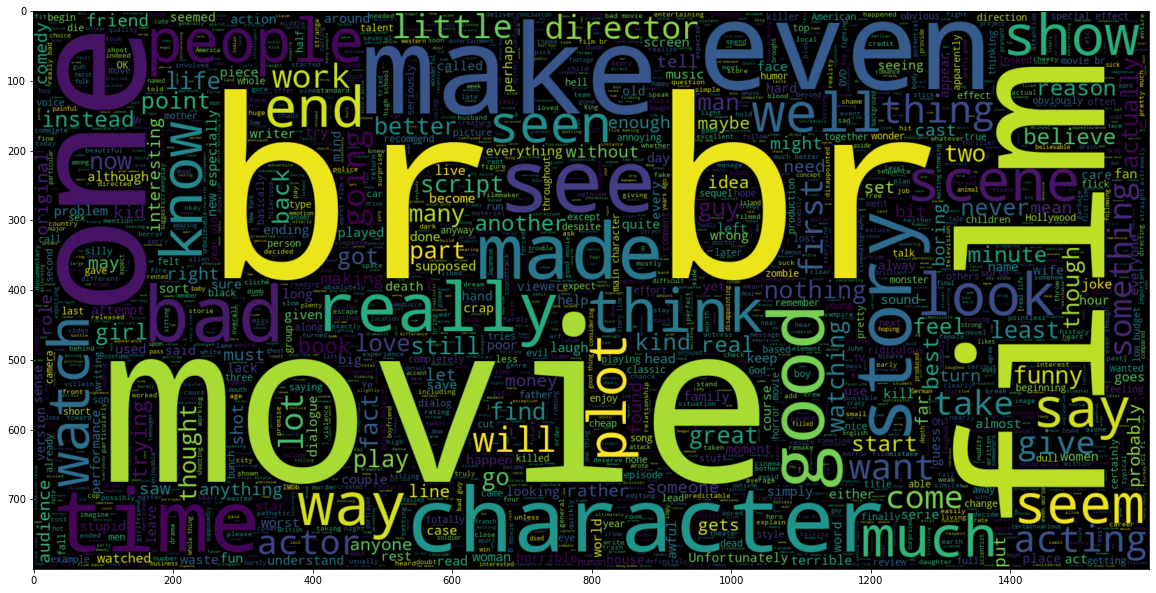

In [11]:
plt.figure(figsize = (20,20))
cloud = WordCloud(max_words= 2000, width= 1600,height= 800).generate("".join(imdb[imdb.sentiment == 0].review))
plt.imshow(cloud, interpolation='bilinear')

In [28]:
#checking missing data
miss_val = imdb.isnull().sum()

miss_val[0:10]

review       0
sentiment    0
dtype: int64

In [29]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)


In [30]:
def clean_data(sentence):
  doc = nlp(sentence)
  tokens = []
  for token in doc:
    if token.lemma_ != '-PRON-':
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)
  clean_tokens = []
  for token in tokens:
    if token not in punct and token not in stopwords:
      clean_tokens.append(token)
  return clean_tokens


In [16]:
X = imdb['review']
y = imdb['sentiment']

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)



In [27]:
punct = string.punctuation
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

tf_idf = TfidfVectorizer(ngram_range=(1,3), binary= True, smooth_idf= False, tokenizer = clean_data)
svm = LinearSVC()

steps = [('tfidf',tf_idf), ('svm', svm)]

pipe = Pipeline(steps)

pipe.fit(X_train,y_train)

 

KeyboardInterrupt: 

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

In [ ]:
from sklearn.model_selection imp

In [ ]:
lr = LogisticRegression(penalty='12', max_iter=500,C=1,random_state=42)
lr_tfidf = lr.fit(X_train,y_train)

lr_predict = lr.predict(X_test)


In [ ]:
from sklearn.metrics import accurary_score,roc_curve,auc

def evaluate_roc(probs,y_test):
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve


In [ ]:
from transformers import AutoConfig,AutoTokenizer, AutoModel

import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import torch.nn.functional as F 

